# Complemento de Práctica Guiada de Laboratorio 5 - Curso IA 2025-1 Grupo 3 EPIS
# Regresión Lineal - Ejercicio Propuesto

Acaba de obtener un contrato con una empresa de comercio electrónico con sede en la ciudad de Nueva York que vende ropa en línea, pero también tienen sesiones de asesoramiento sobre vestimenta y estilo en la tienda. Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden irse a sus casas y pedir, ya sea en una aplicación móvil o en el sitio web, la ropa que desean.

La compañía está tratando de decidir si enfocar sus esfuerzos en la experiencia de su aplicación móvil o en su sitio web. ¡Te contrataron para ayudarlos a tomar las decisiones! ¡Empecemos!

Simplemente siga los pasos a continuación para analizar los datos de los clientes (son datos inventados, no se preocupe).

### Integrantes

1. Héctor David Martínez Huamán 21200096
2. Francis Alberto Ramos Garriazo 22200216

## Importación de librerias
** Importar pandas, numpy, matplotlib,y seaborn. Luego establezca %matplotlib inline 
(Importará sklearn a medida que lo necesite.)**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Recuperar los datos

Trabajaremos con el archivo csv de clientes de comercio electrónico de la compañía. Tiene información del Cliente, como Correo electrónico, Dirección y su color Avatar. También tiene columnas de valores numéricos:

* Avg. Session Length: Promedio de asesoramiento de estilo en la tienda.
* Time on App: Tiempo promedio dedicado a la aplicación en minutos.
* Time on Website: Tiempo promedio dedicado al sitio web en minutos.
* Length of Membership: Cuántos años el cliente ha sido miembro. 

** Lea en el archivo csv de clientes de comercio electrónico como un DataFrame llamado clientes.**

In [43]:
Ecommerce_customers = pd.read_csv("Ecommerce Customers")

**Revise las primeras filas de customers, y reviselas con los métodos info() y describe().**

In [46]:
Ecommerce_customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [48]:
Ecommerce_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [50]:
Ecommerce_customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análsis de Datos Exploratorios

**¡Exploremos los datos!**

Para el resto del ejercicio, solo utilizaremos los datos numéricos del archivo csv.
___
**Use seaborn para crear una gráfica conjunta para comparar las columnas Time on Website y Yearly Amount Spent. ¿Tiene sentido la correlación?**

In [67]:
df_clean = Ecommerce_customers.dropna(subset=["Time on Website", "Yearly Amount Spent"])

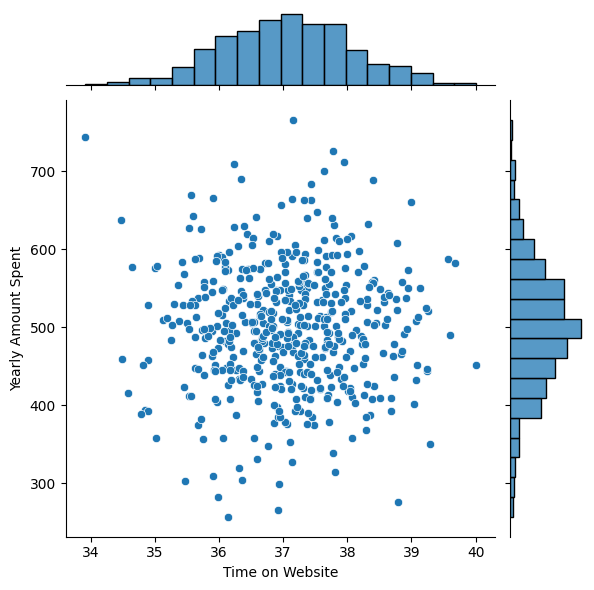

In [77]:
g = sns.JointGrid(data=df_clean, x="Time on Website", y="Yearly Amount Spent")
g.plot(sns.scatterplot, sns.histplot)

** Haz lo mismo pero con la columna Time on App en su lugar. **

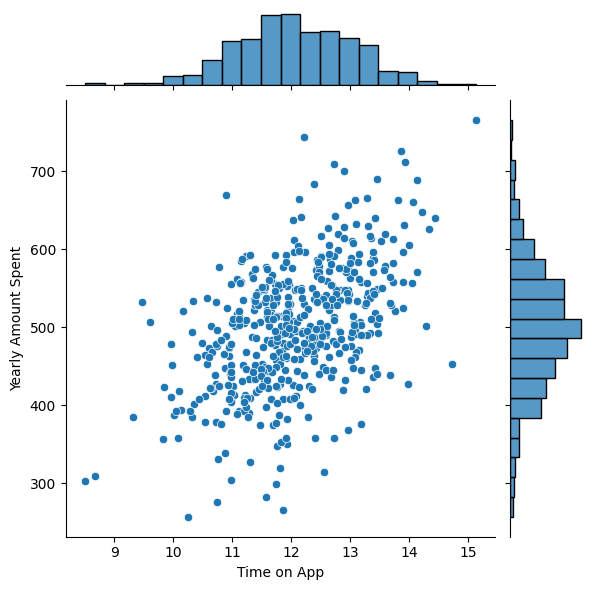

In [79]:
g = sns.JointGrid(data=df_clean, x="Time on App", y="Yearly Amount Spent")
g.plot(sns.scatterplot, sns.histplot)

** Use jointplot para crear un gráfico 2D hex bin comparando Time on App y Length of Membership.**

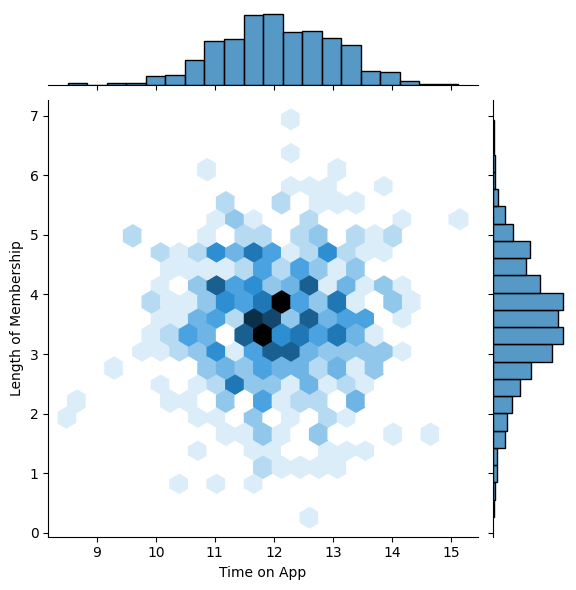

In [81]:
sns.jointplot(data=df_clean, x="Time on App", y="Length of Membership", kind="hex")

**Exploremos este tipo de relaciones en todo el conjunto de datos. Usa [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot)  para recrear la gráfica de abajo. (No te preocupes por los colores)...Exploremos este tipo de relaciones en todo el conjunto de datos.**

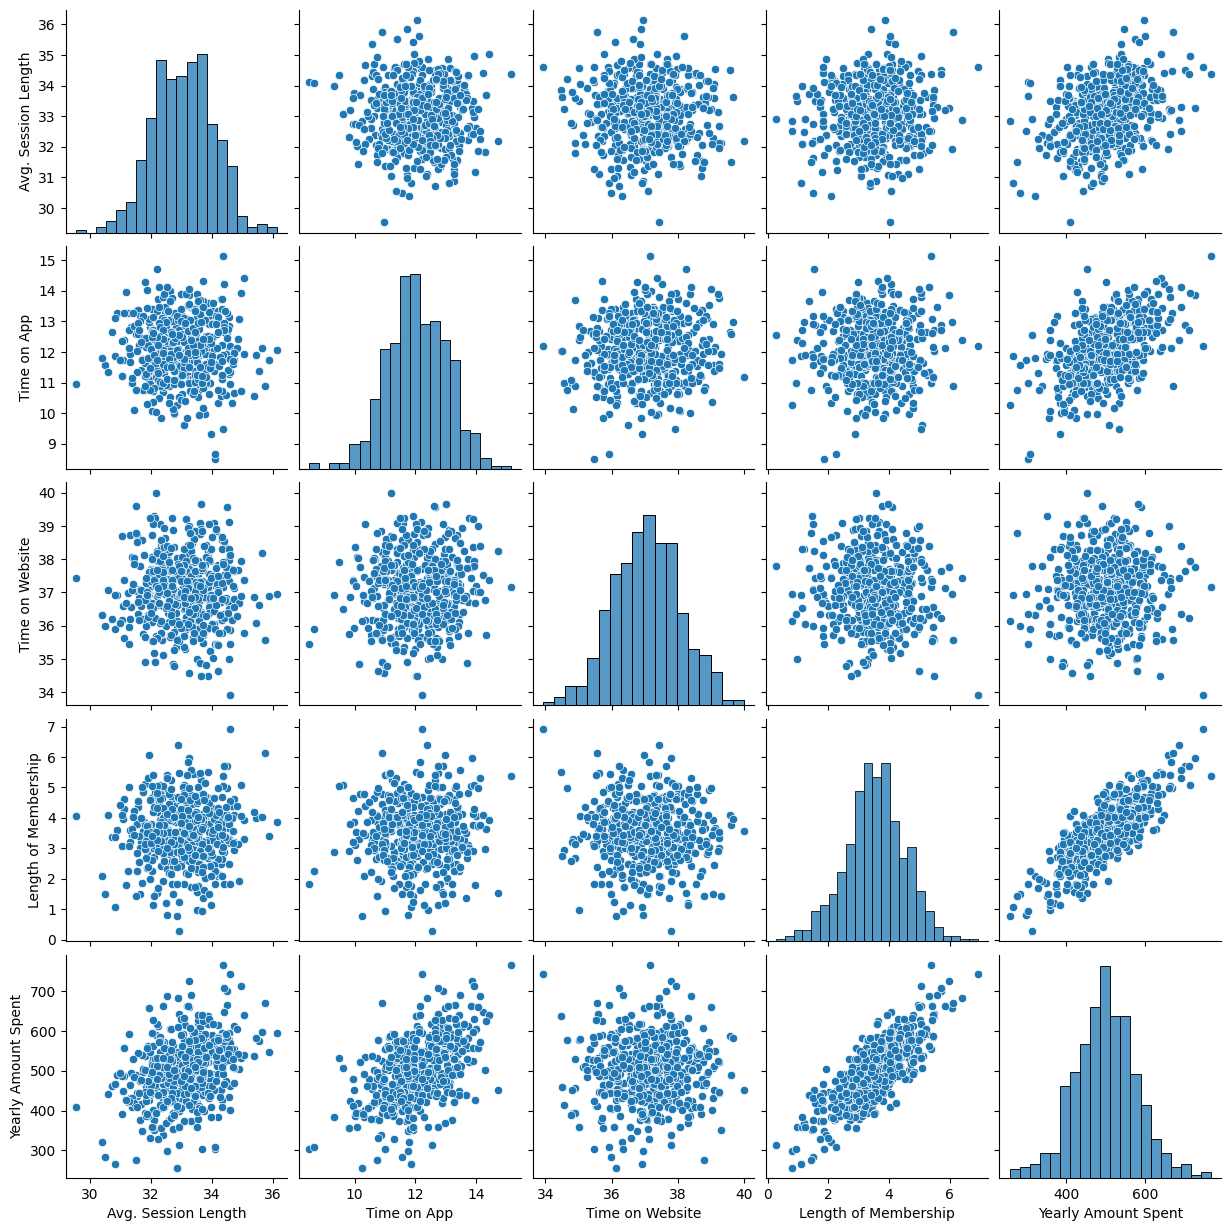

In [85]:
sns.pairplot(df_clean)

**Basado en esta trama, ¿cuál parece ser la característica más correlacionada con la cantidad anual gastada?**

La cantidad anual gastada (*Yearly Amount Spent*) parece tener mayor **grado de correlación** con la duración de la membresía (*Length of membership*) si comparamos las gráficas de dispersión obtenidas.

**Cree un diagrama de modelo lineal (utilizando lmplot de seaborn) de Yearly Amount Spent vs. Length of Membership. **

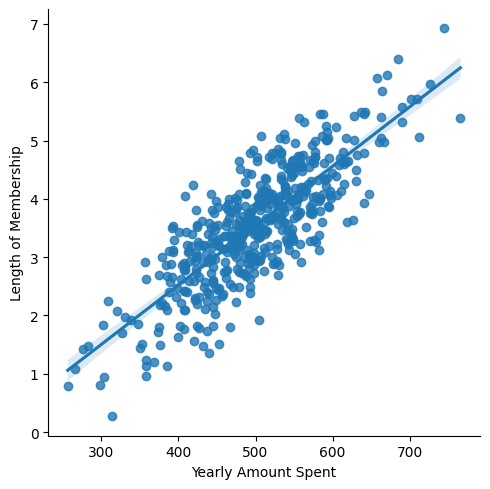

In [89]:
sns.lmplot(data=df_clean, x="Yearly Amount Spent", y="Length of Membership")

## Datos de entrenamiento y prueba

Ahora que hemos explorado un poco los datos, sigamos adelante y dividamos los datos en conjuntos de entrenamiento y prueba. **Establezca una variable X igual a las características numéricas de los clientes y una variable y igual a la columna "Cantidad gastada anual".**

In [29]:
x = Ecommerce_customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [30]:
y = Ecommerce_customers['Yearly Amount Spent']

** Use model_selection.train_test_split de sklearn para dividir los datos en el conjunto de entrenamiento y prueba. Establezca test_size=0.3 y random_state=101**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Entrenamiento del modelo

¡Ahora es el momento de entrenar a su modelo con nuestros datos de entrenamiento!

** Importar LinearRegression desde sklearn.linear_model **

In [33]:
from sklearn.linear_model import LinearRegression

**Crear una instancia del modelo LinearRegression() llamado lm.**

In [34]:
lm = LinearRegression()

** Entrenar/ajustar lm con los datos de entrenamiento.**

In [35]:
lm.fit(x_train,y_train)

LinearRegression()

**Imprima los coeficientes del modelo**

In [49]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicción con los datos de prueba
Ahora que hemos ajustado nuestro modelo, ¡evaluemos su rendimiento prediciendo los valores de prueba!

** Use lm.predict () para predecir el conjunto X_test de los datos.**

In [50]:
predicciones = lm.predict(x_test)

** Cree un diagrama de dispersión de los valores de prueba reales frente a los valores predichos. **

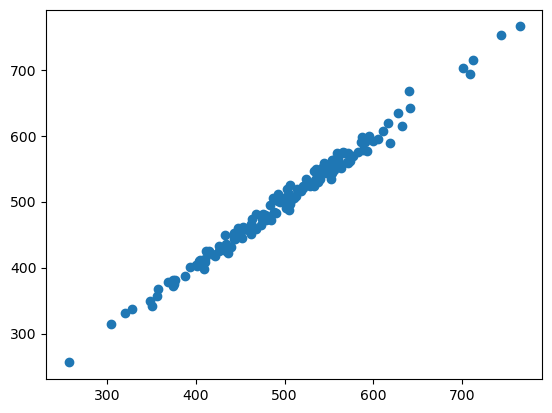

In [51]:
plt.scatter(y_test,predicciones)

## Evaluación del modelo

Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y la puntuación de varianza explicada (R ^ 2).

** Calcule el error absoluto promedio, el error cuadrado promedio y la raíz del error cuadrático promedio.**


**Mean Absolute Error** 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error**

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error**

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [52]:
from sklearn import metrics

In [53]:
print('MAE', metrics.mean_absolute_error(y_test,predicciones))
print('MSE', metrics.mean_squared_error(y_test,predicciones))
print('RMSE', metrics.root_mean_squared_error(y_test,predicciones))

MAE 7.22814865343083
MSE 79.8130516509744
RMSE 8.933815066978632


**Análisis:**


**MAE (Error Absoluto Medio):** 7.23
Indica que las predicciones del modelo se desvían 7.23 unidades del valor real. Es una medida sencilla de error promedio.

**MSE (Error Cuadrático Medio):** 79.81
Penaliza con mayor fuerza a los errores grandes que el MAE, ya que eleva al cuadrado las diferencias. Esto sugiere que hay algunos errores más grandes presentes.

**RMSE (Raíz del Error Cuadrático Medio):** 8.93
Es la raíz cuadrada del MSE y se interpreta en las mismas unidades que las variables originales. Confirma que los errores promedio están cerca de 9 unidades.

## Residuales

Deberías haber obtenido un modelo muy bueno con un buen ajuste. Exploremos rápidamente los residuos para asegurarnos de que todo esté bien con nuestros datos.

**Trace un histograma de los residuos y asegúrese de que se vea distribuido normalmente. Utilice ya sea distplot de seaborn o simplemente plt.hist ()**

In [84]:
import scipy.stats as stats
import matplotlib.pyplot as plt

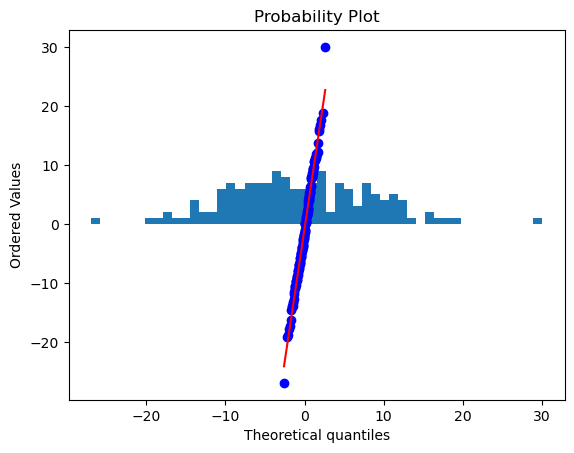

In [85]:
plt.hist((y_test-predicciones),bins=50);
stats.probplot(y_test-predicciones, dist="norm", plot=plt)
plt.show()

**Análisis**: Se ha trazado un histograma de los residuos junto al gráfico Q-Q para comprobar si estos siguen una distribución normal. Se observa quee la mayoría de puntos azules se alinean sobre la línea roja, lo que significa que los residuos se aproximan a una distribución normal ideal. Sin embargo, existen pequeñas desviaciones en los extremos, llamados outliers, que son comunes y aceptables en un ejercicio práctico real.

## Conclusión
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recrea el dataframe de abajo. **

In [86]:
coeficientes = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeficientes

,Coeficiente
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** ¿Cómo puedes interpretar estos coeficientes? **

**¿Crees que la empresa debería centrarse más en su aplicación móvil o en su sitio web?**

**Análisis de coeficientes**
1. **Avg. Session Length:** Mantiendo las características fijas, un incremento de 1 aumenta en 25,9 dólares Este coeficiente indica que un aumento en la duración promedio de la sesión está relacionado positivamente con el ingreso. 


2. **Time on App:** Manteniendo fijas las demás características, un aumento de 1 unidad en el tiempo que un usuario pasa en la aplicación se asocia con un incremento de 38.59 dólares en el ingreso. Tiene uno de los mayores impactos sobre el ingreso en comparación con otras métricas.


3. **Time on Website:**  Manteniendo constantes las demás variables, un aumento de 1 unidad en el tiempo que un usuario pasa en el sitio web se relaciona con un aumento de 0.19 dólares en el ingreso. Este coeficiente considerablemente menor en comparación con el de la aplicación móvil. 


4. **Length of Membership:** Manteniendo constantes las demás características, un aumento de 1 unidad en la duración de la membresía está relacionado con un aumento de 61.28 dólares en el ingreso. Es el coeficiente con mayor impacto, lo que sugiere que retener a los usuarios a largo plazo es un factor clave.

**Conclusión final**: Los coeficientes sugieren que la empresa debe centrarse en mejorar su aplicación móvil, ya que tiene un impacto significativamente mayor sobre los ingresos en comparación con el sitio web. Además, la retención de usuarios a largo plazo es un factor crucial dado que la duración de la membresía tiene el mayor impacto en los ingresos. Una estrategia que combine la optimización de la aplicación móvil y la mejora de la retención podría ser altamente efectiva para maximizar los ingresos.

### Instrucciones para el envío de la solución

La solución del "Complemento de Práctica Guiada de Laboratorio 5 - IA 2025-1 G3 EPIS" junto con la solución de la "Práctica Guiada de Laboratorio 5 - IA 2025-1 G3 EPIS" deberán enviarse al correo electrónico rmaguinacursos@gmail.com, hasta las 23:59 h del Jueves 01 de Mayo del 2025, en un archivo con extensión .ipynb.

Los dos documento deberán tener las sgtes características:

- Nombres de los archivos:

           solPGL5_IA_2025-1_G3_nombre-apellidos_alumno1_nmbre-apellidos_alumno2.ipynb.

           solComplemento_PGL5_IA_2025-1_G3_nombre-apellidos_alumno1_nmbre-apellidos_alumno2.ipynb.

- Todas las preguntas de la Práctica deben responderse en un cuaderno computacional interactivo (**Sugerencia**: obtener una copia de este documento y desarrollar en éllas las respectivas soluciones); la solución a cada pregunta debe registrarse en una celda debajo del planteamiento de la misma, mencionando explícitamente como subtítulo: "Solución del ejercicio n", donde "n" corresponde al número del ejercicio.